# Homework 1: Gardening Business Problem
#### Lucía Cordero Sánchez (100451778)
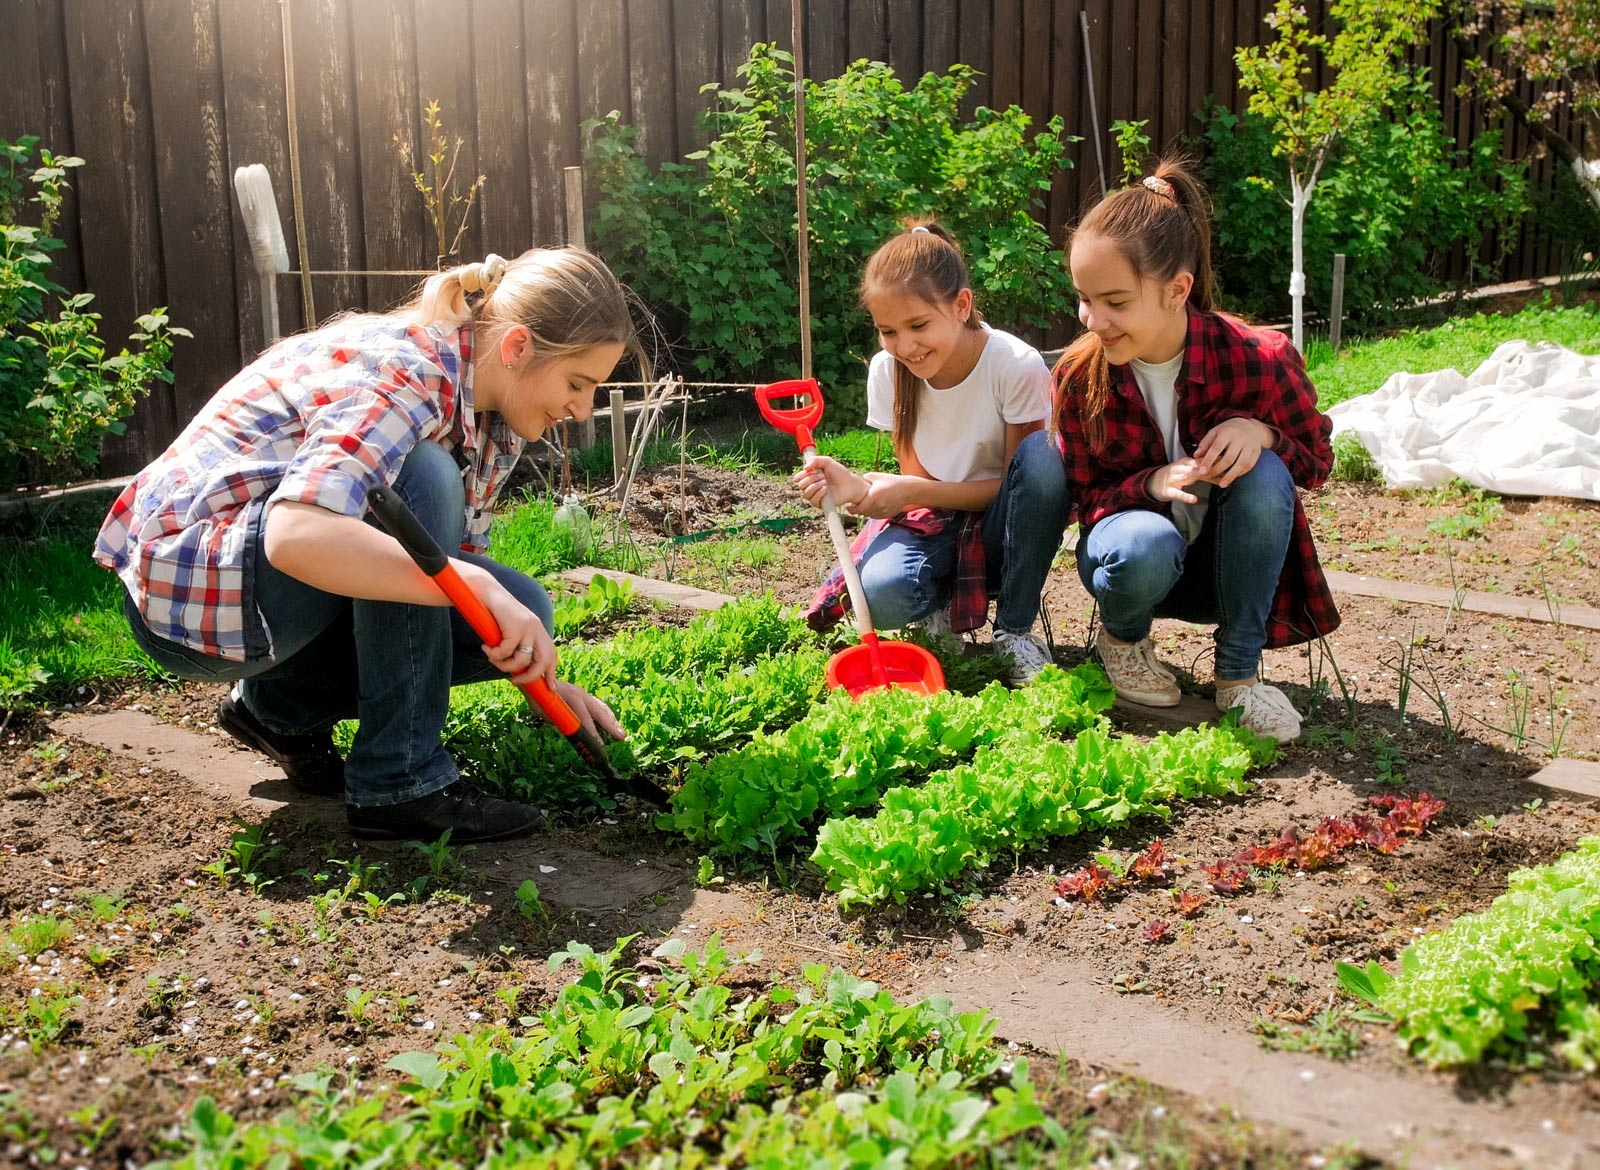

## Summary

There is a community of neighbors looking for a company to hire their services on gardening, anti-plagues and anti-insects in order for their common utilities and their private gardens to be safe and clean.
For this purpose, they request the prices of 10 different local businesses that provide these services.

The said companies offers the following prices (**in EUR**) for their services:

| Service \ Company                 | **C1** | **C2** | **C3**     | **C4**     | **C5** | **C6** | **C7**     | **C8**     | **C9**     | **C10**    |
|------------------------------------|--------|--------|------------|------------|--------|--------|------------|------------|------------|------------|
| **Pool maintenance**               | 150 | 210    | 185        | 170 | 310    | 215    | 175     | 160        | 205        | 210     |
| **Rats extermination**            | 250 | 230    | 245        | 250        | 235    | 245    | 210        | 235        | 265        | 235     |
| **Intense anti-plagues treatment** | 185    | 183    | 188     | 195        | 190.5 | 174    | 185.5 | 180        | 182        | 185     |
| **Natural anti-plagues treatment** | 193.5 | 189    | 188        | 192        | 193    | 209    | 200        | 199.5     | 201     | 205        |
| **Gardening decoration plan**      | 87.5  | 91  | 79         | 82         | 95     | 93     | 90         | 91.5      | 95.5      | 91.5      |
| **Plants care**                    | 115    | 113    | 112 | 115     | 111 | 112    | 111     | 123        | 109         | 108 |
| **Fertilizant treatment**          | 235    | 224 | 227        | 231        | 229    | 225 | 234        | 220     | 221        | 241     |
| **Trees planting**                 | 65     | 68.5  | 61.5      | 62         | 66     | 63     | 64         | 67         | 69         | 65   |
| **All-covered service**            | 315    | 312.5 | 318        | 314.5      | 316    | 318    | 312        | 319 | 321 | 312.5        |

Also, we know the minimum number of gardens in the community that need each service so that they are safe and clean, and each neighbour will apply to their garden the cheapest treatment in terms of budget for the whole community.

|  Service | Pool | Rats | IAT | NAT | Gardening | Plants | Fertilizant | Trees planting | All-covered | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Requirement | 13 | 45 | 16 | 31 | 6 | 18 | 34 | 23 | 25 | 16 |

Moreover, in the signed agreement that each company offers, the company specifies the coverage of each service (**in months**), or the time in which they guarantee efectiveness for each treatment.

| Service \ Coverage (in months)     | **C1** | **C2** | **C3** | **C4** | **C5** | **C6** | **C7** | **C8** | **C9** | **C10** |
|------------------------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|---------|
| **Pool maintenance**               | 4    | 5      | 4      | 6      | 7      | 5      | 3      | 4      | 6      | 6       |
| **Rats extermination**             | 7      | 6      | 6      | 7      | 6    | 6      | 5    | 6      | 7    | 5       |
| **Intense anti-plagues treatment** | 6      | 6      | 6    | 7    | 6      | 5    | 7      | 8      | 6      | 6     |
| **Natural anti-plagues treatment** | 5      | 7      | 4    | 7      | 7    | 8      | 7    | 6      | 5      | 5     |
| **Gardening decoration plan**      | 6      | 4      | 5      | 5      | 5    | 6      | 4    | 6      | 7      | 6       |
| **Plants care**                    | 4      | 3      | 4      | 5      | 4      | 5      | 6      | 5    | 4      | 6       |
| **Fertilizant treatment**          | 8      | 7      | 7    | 7      | 6      | 7      | 6      | 5      | 6      | 5     |
| **Trees planting**                 | 4      | 3      | 4      | 4      | 3      | 4      | 3      | 5      | 4      | 5       |
| **All-covered service**            | 5      | 4      | 3      | 6      | 5      | 2      | 7      | 5      | 6      | 3       |


## 0. General formulation of the problem (model sets & parameters)

#### Import the pyomo module

In [1]:
#Importing the required modules
import pandas as pd
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

### The data

In [2]:
model = ConcreteModel("Gardening Problem")

#### Definition of the sets

In [3]:
#Sets are created as attributes object of the main model objects
services = ['Pool maintenance', 'Rats extermination', 'IAT', 'NAT', 'Gardening', 'Plants care', 'Fertilizants', 'Trees planting', 'All-covered']
companies = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']

#### Parameters

In [4]:
#The parameter (data we know prior to solving the problem) are the prices per service and company, and the coverage of each treatment

prices = np.zeros(shape=(len(services),len(companies)))
prices[0] = np.array([151,210,185,170,310,215,175,160,205,210])
prices[1] = np.array([250,230,245,250,235,245,210,235,265,235])
prices[2] = np.array([185,183,188,195,190,174,185,180,182,185])
prices[3] = np.array([193,189,188,192,193,209,200,199,201,205])
prices[4] = np.array([87,91,79,82,95,93,90,91,96,91])
prices[5] = np.array([115,113,112,115,111,112,111,123,109,108])
prices[6] = np.array([235,224,227,231,229,225,234,220,221,241])
prices[7] = np.array([65,68,61,62,66,63,64,67,69,65])
prices[8] = np.array([315,312,318,314,316,318,312,318,321,312])

coverage = np.zeros(shape=(len(services),len(companies)))
coverage[0]=np.array([4,5,4,6,7,5,3,4,6,6] )
coverage[1]=np.array([7,6,6,7,6,6,5,6,7,5])
coverage[2]=np.array([6,6,6,7,6,5,7,8,6,6])
coverage[3]=np.array([5,7,4,7,7,8,7,6,5,5]) 
coverage[4]=np.array([6,4,5,5,5,6,4,6,7,6])
coverage[5]=np.array([4,3,4,5,4,5,6,5,4,6]) 
coverage[6]=np.array([8,7,7,7,6,7,6,5,6,5])
coverage[7]=np.array([4,3,4,4,3,4,3,5,4,5])
coverage[8]=np.array([5,4,3,6,5,2,7,5,6,3]) 


## 1. Definition of variables

To avoid defining the 90 variables manually, let's define them automatically below:

In [5]:
#empty matrix
matrix = [["" for col in range(0, len(companies))] for row in range(0, len(services))]

count = 0 #count on the already defined variables
for i in range(len(services)):
    for j in range(len(companies)):
        matrix[i][j] =  'x_' + str(count)
        count +=1

#put everything into a dataframe
pd.DataFrame(matrix,index = services,columns = companies)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
Pool maintenance,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
Rats extermination,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
IAT,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29
NAT,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39
Gardening,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
Plants care,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59
Fertilizants,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69
Trees planting,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79
All-covered,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89


In [6]:
model.i = range(len(services))
model.j = range(len(companies))
x_support = range(len(services)*len(companies))

model.x = Var(x_support, doc='# of tasks hired per company', within=NonNegativeReals)

##### Lists to use later

In [7]:
#We get the array of coverage and prices in 1 dimension to use them later:
coverage_1dlist = []
for i in model.i:
    for j in model.j:
        coverage_1dlist.append(coverage[i,j])

prices_1dlist = []
for i in model.i:
    for j in model.j:
        prices_1dlist.append(prices[i,j])


## 2. Objective function

Our objective is to minimize the cost of hiring the demanded services for the community by optimizing the companies in which the neighbors buy.

\begin{align*}
\underset{}{\min} & \quad \sum_{i=1}^{8}\sum_{j=1}^{10}Price_{ij}*x_{ij}\\
\text{s.t.:}&\\
  &\sum_{j=1}^{10} x_{ij} \geq {Requirement}_{i} \quad \forall i\\
  &x_{ij} \geq 0 \quad \forall ij 
\end{align*}

(more detailed explanation with the constraints below)

In [8]:
def objective_rule(model):
    return sum(model.x[elem]*prices_1dlist[elem] for elem in x_support)

In [9]:
model.objective = Objective(rule = objective_rule, sense=minimize, doc='Minimum cost')

## 3. Declaring the constraints

The constraints are reflected in the previous set of equations: we want that the sum of each service hired (the sum of each row) are greater or equal than the required per that service in the community (so that all gardens that need care have a company providing that service to them).
Let's define the **constrain matrix**:

In [10]:
A = np.zeros(shape = (9, 90))

"""
We know that in the first row i=0 there will be eight 1s (at j=0-7),
then for i = 1 (the second row) there will be another eight 1s (from j=8-15),
and so on until i = 10, so we can automatize this task instead of creating the dataframe manually
"""
starting_point = -10
for i in model.i:
    starting_point += 10
    j = 0
    while j < len(companies):
        A[i,j+starting_point] = 1
        j +=1

#convert into a dataframe        
pd.DataFrame(A,index = services)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Pool maintenance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rats extermination,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gardening,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plants care,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fertilizants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trees planting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All-covered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Moreover, we want to fulfill another constraint: as **the presidency of the community lasts for a year**, we need that **all hired companies per each service sign contracts to keep these services for at least 12 months** (until the next budgets and changes of presidency come).

 
\begin{align*}
\sum_{j=1}^{10} (x_{ij}*Coverage_{ij}) \geq {Requirement}_{i}*12 \quad \forall i\end{align*}

as the sum of all $x_{ij}$ for a fixed i and all j must be greater or equal to the required services (for such row) and the sum of all coverages from the selected service must be greater or equal to 12.

In code:

In [11]:
#We get required contracts per service (demand) as an array to use later:
demand = [13,45,16,31,6,18,34,23,25]
required_coverage = 12

model.constraints = ConstraintList()
for i in model.i:
    model.constraints.add(sum(A[i,elem]*model.x[elem]*coverage_1dlist[elem] for elem in x_support) >= demand[i]*required_coverage)

The last constraint is the demand, reflected in the summary part:

|  Service | Pool | Rats | IAT | NAT | Gardening | Plants | Fertilizant | Trees planting | All-covered | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Requirement | 13 | 45 | 16 | 31 | 6 | 18 | 34 | 23 | 25 | 16 |


## 4. Solving the problem 

In [12]:
# Define a solver 
Solver = SolverFactory('glpk')

# Obtain the solution
model.dual = Suffix(direction=Suffix.IMPORT)
Results = Solver.solve(model)

# Display solution
model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    9 : {1, 2, 3, 4, 5, 6, 7, 8, 9}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   90 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}

1 Var Declarations
    x : # of tasks hired per company
        Size=90, Index=x_index
        Key : Lower : Value            : Upper : Fixed : Stale : Domain
          0 :     0 :              0.0 :  None : False : False : NonNegativeReals
          1 :     0 :              0.0 :  None : False : False : NonNegati

In [13]:
#Display the objective (minimum cost)
print("The minimum cost obtained for this problem is:", model.objective())

The minimum cost obtained for this problem is: 71564.07142857143


In [14]:
#Display the results more clearly
results_df = pd.DataFrame()
index = -1

for i in range(len(services)):
    for j in range(len(companies)):
        index += 1
        results_df.loc[i,j] = 'x[' + str(index) + '] = ' + str(model.x[index]())

results_df.columns = companies
results_df.index  = services

print("The results for this problem are")
results_df

The results for this problem are


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
Pool maintenance,x[0] = 0.0,x[1] = 0.0,x[2] = 0.0,x[3] = 26.0,x[4] = 0.0,x[5] = 0.0,x[6] = 0.0,x[7] = 0.0,x[8] = 0.0,x[9] = 0.0
Rats extermination,x[10] = 77.1428571428571,x[11] = 0.0,x[12] = 0.0,x[13] = 0.0,x[14] = 0.0,x[15] = 0.0,x[16] = 0.0,x[17] = 0.0,x[18] = 0.0,x[19] = 0.0
IAT,x[20] = 0.0,x[21] = 0.0,x[22] = 0.0,x[23] = 0.0,x[24] = 0.0,x[25] = 0.0,x[26] = 0.0,x[27] = 24.0,x[28] = 0.0,x[29] = 0.0
NAT,x[30] = 0.0,x[31] = 0.0,x[32] = 0.0,x[33] = 0.0,x[34] = 0.0,x[35] = 46.5,x[36] = 0.0,x[37] = 0.0,x[38] = 0.0,x[39] = 0.0
Gardening,x[40] = 0.0,x[41] = 0.0,x[42] = 0.0,x[43] = 0.0,x[44] = 0.0,x[45] = 0.0,x[46] = 0.0,x[47] = 0.0,x[48] = 10.2857142857143,x[49] = 0.0
Plants care,x[50] = 0.0,x[51] = 0.0,x[52] = 0.0,x[53] = 0.0,x[54] = 0.0,x[55] = 0.0,x[56] = 0.0,x[57] = 0.0,x[58] = 0.0,x[59] = 36.0
Fertilizants,x[60] = 51.0,x[61] = 0.0,x[62] = 0.0,x[63] = 0.0,x[64] = 0.0,x[65] = 0.0,x[66] = 0.0,x[67] = 0.0,x[68] = 0.0,x[69] = 0.0
Trees planting,x[70] = 0.0,x[71] = 0.0,x[72] = 0.0,x[73] = 0.0,x[74] = 0.0,x[75] = 0.0,x[76] = 0.0,x[77] = 0.0,x[78] = 0.0,x[79] = 55.2
All-covered,x[80] = 0.0,x[81] = 0.0,x[82] = 0.0,x[83] = 0.0,x[84] = 0.0,x[85] = 0.0,x[86] = 42.8571428571429,x[87] = 0.0,x[88] = 0.0,x[89] = 0.0


## 4.1. Interpretation

Reminder of the prices per service and company

| Service \ Company                 | **C1** | **C2** | **C3**     | **C4**     | **C5** | **C6** | **C7**     | **C8**     | **C9**     | **C10**    |
|------------------------------------|--------|--------|------------|------------|--------|--------|------------|------------|------------|------------|
| **Pool maintenance**               | 150 | 210    | 185        | 170 | 310    | 215    | 175     | 160        | 205        | 210     |
| **Rats extermination**            | 250 | 230    | 245        | 250        | 235    | 245    | 210        | 235        | 265        | 235     |
| **Intense anti-plagues treatment** | 185    | 183    | 188     | 195        | 190.5 | 174    | 185.5 | 180        | 182        | 185     |
| **Natural anti-plagues treatment** | 193.5 | 189    | 188        | 192        | 193    | 209    | 200        | 199.5     | 201     | 205        |
| **Gardening decoration plan**      | 87.5  | 91  | 79         | 82         | 95     | 93     | 90         | 91.5      | 95.5      | 91.5      |
| **Plants care**                    | 115    | 113    | 112 | 115     | 111 | 112    | 111     | 123        | 109         | 108 |
| **Fertilizant treatment**          | 235    | 224 | 227        | 231        | 229    | 225 | 234        | 220     | 221        | 241     |
| **Trees planting**                 | 65     | 68.5  | 61.5      | 62         | 66     | 63     | 64         | 67         | 69         | 65   |
| **All-covered service**            | 315    | 312.5 | 318        | 314.5      | 316    | 318    | 312        | 319 | 321 | 312.5        |


The objective was to satisfy the demand of services for the whole neighborhood (given in the table below) in the cheapest possible way. 


\begin{align*}
Objective = \underset{}{\min} & \quad \sum_{i=1}^{90}Price_{i}*x_{i}\end{align*}

In other words, we needed to minimize the sum of the number of services hired multuplied by its corresponding price, constrained to the fact that we needed this supply for 12 months (as each treatment has a particular guarantee time).

In this case, the objective function solved is:

$Objective = 26*170 + 77.14*250 + 24*180 + 46.5*209 + 10.29*95.5 + 36*108 + 51*235 + 55.2*65 + 42.86*312\approx26*170+ 78*250 + 24*180 + 47*209 + 11*95.5 + 36*108 + 51*235 + 53*65 + 43*312 = 71564€$

Note that in the rounding of the services (as we cannot have half a service, or 0.64 services) we assume that we are still fulfilling the constraints.

In plain words, to pay the minimum possible price to hire all the required services we need to hire:

26 tasks for Pool maintenance from Company 4, 78 tasks for Rats extermination from Company 1, 24 tasks for Intense anti-plagues treatment from Company 8, 47 tasks for Natural anti-plagues treatment from Company 6, 11 tasks for Gardening decoration plan from Company 9, 36 tasks for Plants care from Company 10, 51 tasks for Fertilizant treatment from Company 1, 53 tasks for Trees planting from Company 10 and 43 tasks for All-covered from Company 7.

The total budget after hiring all these services is 71564€.

| Service                            | Best company to hire | # Tasks hired (to fill 12 months) | Min. requirement | Coverage of one service from the selected company |
|------------------------------------|--------------|-----------------------------------|------------------|---------------------------------------------------|
| **Pool maintenance**               | C4           | 26                                | 13               | 6 months                                          |
| **Rats extermination**             | C1           | 78                                | 45               | 7 months                                          |
| **Intense anti-plagues treatment** | C8           | 24                                | 16               | 8 months                                          |
| **Natural anti-plagues treatment** | C6           | 47                                | 31               | 8 months                                          |
| **Gardening decoration plan**      | C9           | 11                                | 6                | 7 months                                          |
| **Plants care**                    | C10          | 36                                | 18               | 6 months                                          |
| **Fertilizant treatment**          | C1           | 51                                | 34               | 8 months                                          |
| **Trees planting**                 | C10          | 53                                | 23               | 5 months                                          |
| **All-covered service**            | C7           | 43                                | 25               | 7 months      |

## 5. Sensitivities associated with the constraints

In [15]:
display(model.dual)
#model.dual.display()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key            : Value
    constraints[1] : 28.3333333333333
    constraints[2] : 35.7142857142857
    constraints[3] :             22.5
    constraints[4] :           26.125
    constraints[5] : 13.7142857142857
    constraints[6] :             18.0
    constraints[7] :           29.375
    constraints[8] :             13.0
    constraints[9] : 44.5714285714286


The sensitivities are used to determine how independent variable values will impact a particular dependent variable under a given set of assumptions. It allows to know where there is a range of improvements for the future and how different our result to the objective function would be if we increased a constraint in one unit.

In plain words, the sensitivity shows how tolerant each constraint is to changes, the larger sensitivity, the less tolerance that constraint has to increasing, as it would be more expensive in the final result to change such constraint.

The first thing we see in our sensitivities is that for all of them an increase would affect the budget (none of them is zero or close).

The increases in the budget per unit increased are not very significant considering the ranges of prices in which the services are (around 100-300€, with changes per unit of 13-45€) and the final objective (for 12 months).

Increasing in one task the Trees planting service, our budget would only increase by 13€ (it is logic, as it is the cheapest service in all companies). The same happens the other way around, the most expensive service (All-included) is the least tolerant to changes, with an increase of 44.5€ per unit increase.

To affect the least possible the objective results, we would preferably increase units of tasks in Trees planting (13€ of surplus), Gardening decoration plan (13.7€), Plants care (18€), IAT (22.5€) and Pool maintenance (28.33€), and avoid increases in the tasks of services such as Rats extermination, Fertilizant treatment and All-covered service (35.71€, 29.37€ and 44.57€ of surplus respectively).

In [16]:
sensitivities = [28.33,35.71,22.5,26.125,13.71,18,29.38,13,44.57]
proportion_increase = []

for i in range(len(sensitivities)):
    median = np.median(prices[i])
    proportion_increase.append(sensitivities[i]*100/median)
    
proportion_increase

[14.528205128205128,
 14.879166666666666,
 12.162162162162161,
 13.329081632653061,
 15.065934065934066,
 16.071428571428573,
 12.885964912280702,
 20.0,
 14.126782884310618]

If we take proportions instead of absolute numbers, comparing the median of the price for each service of the market and the tolerance to change (sensitivity) of such service, see that compared to their respective prices, all increases in one unit of each service are more or less between the 12%-16% of their median price in the market, except for Trees Planting.

# Part 2: Model with integer constraints

## Summary of the new problem

Again, we have the same situation: the president of a neighbors community need to hire the required services in the best possible way to spend the least possible budget on fixing and taking care of the gardens.

The required services that need to be hired are:

|  Service | Pool | Rats | IAT | NAT | Gardening | Plants | Fertilizant | Trees planting | All-covered |  All-covered + |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  
| Requirement | 13 | 45 | 16 | 31 | 6 | 18 | 34 | 23 | 25 | 16 | 15 |

In this case, the president has a friend that offers all needed services in their business and due to the large budget they have, his friend decides to give the neighbors a discount if they buy the services in packs.

The prices per each service they provide are:

|  Service | Pool | Rats | IAT | NAT | Gardening | Plants | Fertilizant | Trees planting | All-covered | All-covered premium
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| Price (EUR) | 120 | 150 | 170 |120 | 100 | 135 | 130 | 145 | 300 | 350 |

Plus, their offers come in packages 2, 5, 10, 20 and 30 for all services except for All-covered:

|  Pack | Discount (over the total price) |
| --- | --- |
| 2 | 10 EUR |
| 5 | 40 EUR |
| 10 | 150 EUR |
| 20 | 300 EUR |
| 25 | 400 EUR |

As for the All-covered service there is no discount on the business side, the government provides a subsidy: for All-covered, they finance the 15% of the total price and for All-covered premium (same service but better quality in materials), they pay for the 18%.

|  Service | Discount (over the total price) |
| --- | --- |
| All-covered | 15% |
| All-covered+ | 20% |


Another constraint is that we can only use one pack from each type (so we will impose a binary domain in the variable).

In [17]:
# For cleaning local environmnent
%reset -f
import pandas as pd
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

## 0. General formulation of the problem (model sets & parameters)

In [18]:
model2 = ConcreteModel("Gardening Problem with discounts")

#### Definition of the sets (services and packs)

In [19]:
model2.services = Set(initialize=['Pool maintenance', 'Rats extermination', 'IAT', 'NAT', 'Gardening', 'Plants care', 'Fertilizants', 'Trees planting', 'All-covered', 'All-covered+'], doc='services' )
model2.packs = Set(initialize=[1,2,5,10,20,25],doc = 'packs')

#### Parameters (prices of each service with % discount/pack discount)

In [20]:
#
price_before = np.array([120,150,170,120,100,135,130,145,300,350])
discount= np.array([0, 10, 40, 150, 300, 400]) #we combine the direct discounts and % discounts

prices = np.zeros(shape = (len(model2.services), len(model2.packs)))
for i in range(0, 8): #we do not fill the All-covered and All-covered+ rows yet
    for j in range(len(model2.packs)):
        prices[i][j] = (price_before[i]*model2.packs[j+1])-discount[j]

prices = np.round(prices,2)
prices[8,0] = 300*1*0.85
prices[8,1] = 300*2*0.85
prices[8,2] = 300*5*0.85
prices[8,3] = 300*10*0.85
prices[8,4] = 300*20*0.85
prices[8,5] = 300*25*0.85


prices[9,0] = 350*1*0.8
prices[9,1] = 350*2*0.8
prices[9,2] = 350*5*0.8
prices[9,3] = 350*10*0.8
prices[9,4] = 350*20*0.8
prices[9,5] = 350*25*0.8

print("Prices per service with corresponding discounts")
pd.DataFrame(prices, index = model2.services, columns = model2.packs)

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from <ipython-input-20-0ec26c342e36>:8)
Prices per service with corresponding discounts


packs,1,2,5,10,20,25
services,,,,,,
Pool maintenance,120.0,230.0,560.0,1050.0,2100.0,2600.0
Rats extermination,150.0,290.0,710.0,1350.0,2700.0,3350.0
IAT,170.0,330.0,810.0,1550.0,3100.0,3850.0
NAT,120.0,230.0,560.0,1050.0,2100.0,2600.0
Gardening,100.0,190.0,460.0,850.0,1700.0,2100.0
Plants care,135.0,260.0,635.0,1200.0,2400.0,2975.0
Fertilizants,130.0,250.0,610.0,1150.0,2300.0,2850.0
Trees planting,145.0,280.0,685.0,1300.0,2600.0,3225.0
All-covered,255.0,510.0,1275.0,2550.0,5100.0,6375.0


## 1. Definition of variables

In [21]:
#empty matrix
matrix = [["" for col in range(0, len(model2.packs))] for row in range(0, len(model2.services))]

count = 0 #count on the already defined variables
for i in range(len(model2.services)):
    for j in range(len(model2.packs)):
        matrix[i][j] = str(model2.packs[j+1]) +'*x_' + str(count)
        count +=1

#put everything into a dataframe
pd.DataFrame(matrix,index = model2.services,columns = model2.packs)

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in 7.0) (called from <ipython-input-21-2ac219356ff8>:7)


packs,1,2,5,10,20,25
services,,,,,,
Pool maintenance,1*x_0,2*x_1,5*x_2,10*x_3,20*x_4,25*x_5
Rats extermination,1*x_6,2*x_7,5*x_8,10*x_9,20*x_10,25*x_11
IAT,1*x_12,2*x_13,5*x_14,10*x_15,20*x_16,25*x_17
NAT,1*x_18,2*x_19,5*x_20,10*x_21,20*x_22,25*x_23
Gardening,1*x_24,2*x_25,5*x_26,10*x_27,20*x_28,25*x_29
Plants care,1*x_30,2*x_31,5*x_32,10*x_33,20*x_34,25*x_35
Fertilizants,1*x_36,2*x_37,5*x_38,10*x_39,20*x_40,25*x_41
Trees planting,1*x_42,2*x_43,5*x_44,10*x_45,20*x_46,25*x_47
All-covered,1*x_48,2*x_49,5*x_50,10*x_51,20*x_52,25*x_53


In [22]:
x_support = range(60)
model2.x = Var(x_support, doc = "Packs of services hired", within = NonNegativeIntegers)

## 2. Objective function

In [23]:
#We get a 1d-array for the prices again:

prices_1d = []

for i in range(len(model2.services)):
    for j in range(len(model2.packs)):
        prices_1d.append(prices[i,j])
prices_1d = np.array(prices_1d)

In [24]:
#same objective as in part 1, to minimize the total cost
def objective_rule(model):
    return sum(model2.x[elem]*prices_1d[elem] for elem in x_support)

In [25]:
model2.objective = Objective(rule = objective_rule, sense=minimize, doc='Minimum cost')

## 3. Declaring the constraints

In [26]:
A = np.zeros(shape = (10, 60))
"""
We know that in the first row i=0 there will be the list of model2.packs (at j=0-7),
then for i = 1 (the second row) there will be this list repeated again (from j=8-15),
and so on until i = 10, so we can automatize this task instead of creating the dataframe manually
"""
starting_point = -6
packs = np.array(model2.packs)

for i in range(len(model2.services)):
    starting_point += 6
    j = 0
    while j < len(model2.packs):
        A[i][j+starting_point] = packs[j]
        j +=1

#convert into a dataframe        
pd.DataFrame(A,index = model2.services)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
services,,,,,,,,,,,,,,,,,,,,,
Pool maintenance,1.0,2.0,5.0,10.0,20.0,25.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rats extermination,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gardening,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plants care,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fertilizants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trees planting,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All-covered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,10.0,20.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#define the dimensions
I = range(len(A))
J = range(60)

As in our first problem, another constraint is the demand, which follows:

|  Service | Pool | Rats | IAT | NAT | Gardening | Plants | Fertilizant | Trees planting | All-covered |  All-covered + |  
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Requirement | 13 | 45 | 16 | 31 | 6 | 18 | 34 | 23 | 25 | 16 | 15 |

In [28]:
demand = [13,45,16,31,6,18,34,23,25,16]

model2.constraints = ConstraintList()
for i in I:
    model2.constraints.add(sum(A[i,elem]*model2.x[elem] for elem in J) >= demand[i])

## 4. Solution

In [29]:
# Define a solver 
Solver = SolverFactory('glpk')

# Obtain the solution
Results = Solver.solve(model2)

# Display solution
model2.pprint()

4 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    packs : packs
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 5, 10, 20, 25}
    services : services
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {'Pool maintenance', 'Rats extermination', 'IAT', 'NAT', 'Gardening', 'Plants care', 'Fertilizants', 'Trees planting', 'All-covered', 'All-covered+'}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   60 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48

In [30]:
#Display the objective (minimum cost)
print("The minimum cost obtained for this problem is:", model2.objective())

The minimum cost obtained for this problem is: 33870.0


In [31]:
#Display the results more clearly
results_df = pd.DataFrame()
index = -1

for i in range(len(model2.services)):
    for j in range(len(model2.packs)):
        index += 1
        results_df.loc[i,j] = 'x[' + str(index) + '] = ' + str(model2.x[index]())

results_df.columns = model2.packs
results_df.index  = model2.services

print("The results for this problem are")
results_df

The results for this problem are


packs,1,2,5,10,20,25
services,,,,,,
Pool maintenance,x[0] = 1.0,x[1] = 1.0,x[2] = 0.0,x[3] = 1.0,x[4] = 0.0,x[5] = 0.0
Rats extermination,x[6] = 0.0,x[7] = 0.0,x[8] = 0.0,x[9] = 0.0,x[10] = 1.0,x[11] = 1.0
IAT,x[12] = 1.0,x[13] = 0.0,x[14] = 1.0,x[15] = 1.0,x[16] = 0.0,x[17] = 0.0
NAT,x[18] = 1.0,x[19] = 0.0,x[20] = 0.0,x[21] = 3.0,x[22] = 0.0,x[23] = 0.0
Gardening,x[24] = 1.0,x[25] = 0.0,x[26] = 1.0,x[27] = 0.0,x[28] = 0.0,x[29] = 0.0
Plants care,x[30] = 1.0,x[31] = 1.0,x[32] = 1.0,x[33] = 1.0,x[34] = 0.0,x[35] = 0.0
Fertilizants,x[36] = 0.0,x[37] = 2.0,x[38] = 0.0,x[39] = 3.0,x[40] = 0.0,x[41] = 0.0
Trees planting,x[42] = 1.0,x[43] = 1.0,x[44] = 0.0,x[45] = 2.0,x[46] = 0.0,x[47] = 0.0
All-covered,x[48] = 0.0,x[49] = 0.0,x[50] = 5.0,x[51] = 0.0,x[52] = 0.0,x[53] = 0.0


## 4.1. Interpretation

In [33]:
print("Reminder of the final prices after discounts")
pd.DataFrame(prices, index = model2.services, columns = model2.packs)

Reminder of the final prices after discounts


packs,1,2,5,10,20,25
services,,,,,,
Pool maintenance,120.0,230.0,560.0,1050.0,2100.0,2600.0
Rats extermination,150.0,290.0,710.0,1350.0,2700.0,3350.0
IAT,170.0,330.0,810.0,1550.0,3100.0,3850.0
NAT,120.0,230.0,560.0,1050.0,2100.0,2600.0
Gardening,100.0,190.0,460.0,850.0,1700.0,2100.0
Plants care,135.0,260.0,635.0,1200.0,2400.0,2975.0
Fertilizants,130.0,250.0,610.0,1150.0,2300.0,2850.0
Trees planting,145.0,280.0,685.0,1300.0,2600.0,3225.0
All-covered,255.0,510.0,1275.0,2550.0,5100.0,6375.0


The objective was to satisfy the demand of services for the whole neighborhood (given in the table below) in the cheapest possible way thanks to the packs. 

\begin{align*}
Objective = \underset{}{\min} & \quad \sum_{i=1}^{60}Price_{i}*x_{i}\end{align*}

In this case, the objective function solved is:

$Objective = 1*120 + 1*230 + 1*1050 + 1*2700 + 1*3350 + 1*170 + 1*810 + 1*1550 + 1*120 + 3*1050 + 1*100 + 1*460 + 1*135 + 1*260 + 1*635 + 1*1200 + 2*250 + 3*1150 + 1*145 + 1*280 + 2*1300 + 5*1275 + 1*280 + 3*1400 = 33870€$

In plain words, to pay the minimum possible price to hire all the required services we need to hire:

<ul>
    <li>For Pool maintenance (13 tasks of demand): one 1-pack, one 2-pack, one 10-pack</li>
    <li>For Rats extermination (45 tasks of demand): one 20-pack, one 25-pack</li>
    <li>For IAT (16 tasks of demand): one 1-pack, one 5-pack, one 10-pack</li>
    <li>For NAT (31 tasks of demand): one 1-pack, three 10-packs</li>
    <li>For Gardening (6 tasks of demand): one 1-pack, one 5-pack </li>
    <li>For Plants care (18 tasks of demand): one 1-pack, one 2-pack, one 5-pack, one 10-pack</li>
    <li>For fertilizants treatment (34 tasks of demand): two 2-pack, three 10-pack</li>
    <li>For trees planting (23 tasks of demand): one 1-pack, one 2-pack, three 10-packs</li>
    <li>For All-covered (25 tasks of demand): five 5-packs</li>
    <li>For All-covered + (16 tasks of demand): one 1-pack, three 5-packs</li>

</ul>
The total budget after hiring all these services is 33870€.
